<a href="https://colab.research.google.com/github/AndreiAf02/Cholera-Data/blob/main/STAT561_Project_Code_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##STAT 561 Project - Sampling Methodologies in Improving Transfer Learning Efficiency in Diabetes Prediction

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import perf_counter



from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
# !pip install pytorch-tabnet

# from pytorch_tabnet.tab_model import TabNetClassifier
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



## Data taken from the UCI Machine Learning repository [here](https://doi.org/10.24432/C53919):

In [26]:
pip install ucimlrepo

In [27]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)



In [28]:
data = cdc_diabetes_health_indicators.data
# data (as pandas dataframes)
X = data.features
y = data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [29]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,18,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,1,28,0,0,0,1,1,0,...,1,0,1,0,0,0,0,2,5,2
253678,1,0,1,23,0,0,0,0,1,1,...,1,0,3,0,0,0,1,7,5,1


In [30]:
## Scaling the predictive data

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled)

In [31]:
data2 = pd.concat([X_scaled, y], axis=1)
data2

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,Diabetes_binary
0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.00,0.6,0.500000,1.0,0.0,0.666667,0.6,0.285714,0
1,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.50,0.0,0.000000,0.0,0.0,0.500000,1.0,0.000000,0
2,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.00,1.0,1.000000,1.0,0.0,0.666667,0.6,1.000000,0
3,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.25,0.0,0.000000,0.0,0.0,0.833333,0.4,0.714286,0
4,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.25,0.1,0.000000,0.0,0.0,0.833333,0.8,0.428571,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,0.383721,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.50,0.0,0.166667,0.0,1.0,0.333333,1.0,0.857143,0
253676,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.75,0.0,0.000000,1.0,0.0,0.833333,0.2,0.428571,1
253677,0.0,0.0,1.0,0.186047,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.00,0.0,0.000000,0.0,0.0,0.083333,0.8,0.142857,0
253678,1.0,0.0,1.0,0.127907,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.50,0.0,0.000000,0.0,1.0,0.500000,0.8,0.000000,0


In [32]:
y.value_counts()

,count
Diabetes_binary,
0,218334
1,35346


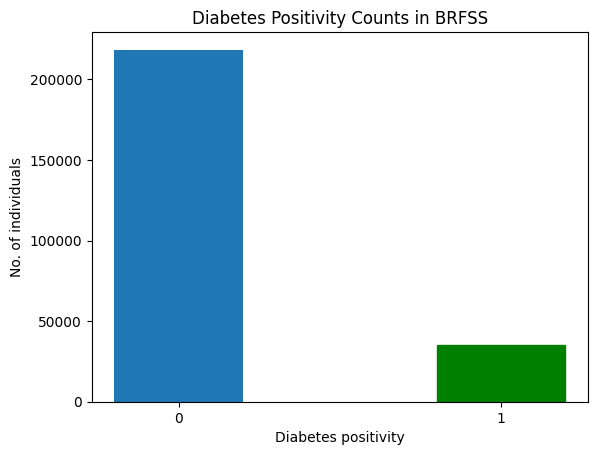

In [33]:
barlist = plt.bar([str(0),str(1)], y.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS")
plt.show()

In [34]:
X['Education'].value_counts()

,count
Education,
6,107325
5,69910
4,62750
3,9478
2,4043
1,174


In [35]:
X_scaled[19].value_counts()

,count
19,
1.0,107325
0.8,69910
0.6,62750
0.4,9478
0.2,4043
0.0,174


# Splitting for Source and Target Domains:


# Full Dataset:

In [36]:
data_S = data2[~data2[19].isin([0.0, 0.2])]  ## Source domain and classification
data_T = data2[data2[19].isin([0.0, 0.2])]  ## Target domain and classification

In [37]:
data_S

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,Diabetes_binary
0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.00,0.6,0.500000,1.0,0.0,0.666667,0.6,0.285714,0
1,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.50,0.0,0.000000,0.0,0.0,0.500000,1.0,0.000000,0
2,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.00,1.0,1.000000,1.0,0.0,0.666667,0.6,1.000000,0
3,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.25,0.0,0.000000,0.0,0.0,0.833333,0.4,0.714286,0
4,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.25,0.1,0.000000,0.0,0.0,0.833333,0.8,0.428571,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253674,0.0,0.0,1.0,0.174419,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.00,0.0,0.000000,0.0,0.0,0.166667,1.0,0.571429,0
253675,1.0,1.0,1.0,0.383721,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.50,0.0,0.166667,0.0,1.0,0.333333,1.0,0.857143,0
253677,0.0,0.0,1.0,0.186047,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.00,0.0,0.000000,0.0,0.0,0.083333,0.8,0.142857,0
253678,1.0,0.0,1.0,0.127907,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.50,0.0,0.000000,0.0,1.0,0.500000,0.8,0.000000,0


In [38]:
data_T

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,Diabetes_binary
21,1.0,1.0,1.0,0.302326,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.00,0.5,1.000000,1.0,0.0,1.000000,0.2,0.285714,0
27,1.0,1.0,1.0,0.186047,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.75,0.0,0.000000,0.0,1.0,0.916667,0.2,0.428571,1
83,0.0,1.0,1.0,0.232558,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.00,0.0,0.000000,1.0,0.0,1.000000,0.2,0.142857,1
95,1.0,1.0,1.0,0.151163,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.00,0.5,1.000000,1.0,0.0,0.666667,0.2,0.285714,1
190,1.0,0.0,1.0,0.267442,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.75,0.0,0.033333,1.0,1.0,0.666667,0.2,0.571429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253645,1.0,0.0,1.0,0.267442,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.75,0.0,0.000000,0.0,1.0,0.166667,0.2,0.000000,0
253652,0.0,1.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.75,0.0,1.000000,0.0,1.0,0.833333,0.2,0.285714,1
253669,0.0,1.0,1.0,0.174419,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.00,0.0,0.100000,0.0,1.0,0.416667,0.2,0.428571,0
253672,1.0,0.0,1.0,0.209302,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.50,0.0,0.000000,0.0,1.0,0.916667,0.2,0.000000,0


## Source domain and task labels:

In [39]:
X_S_full = data_S.iloc[:, :21]
X_S_full       ## Source domain


y_S_full = data_S.iloc[:, 21]
y_S_full       ## Source classification (response)

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0
...,...
253674,0
253675,0
253677,0
253678,0


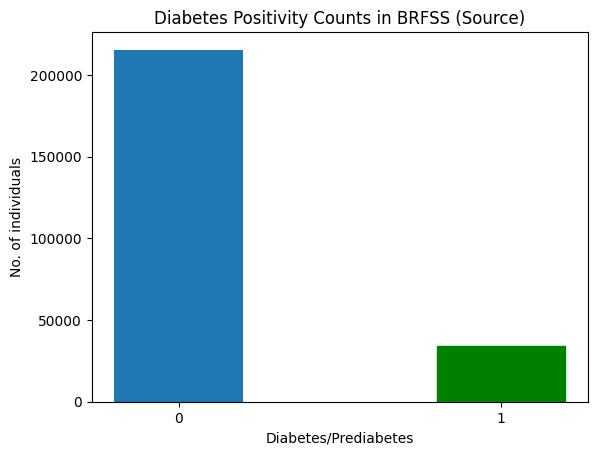

In [40]:
barlist_S = plt.bar([str(0),str(1)], y_S_full.value_counts(), width = 0.4)
barlist_S[1].set_color('g')

plt.xlabel("Diabetes/Prediabetes")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS (Source)")
plt.show()

## Target domain and task labels:

In [41]:
X_T_full = data_T.iloc[:, :21]
X_T_full       ## Target domain


y_T_full = data_T.iloc[:, 21]
y_T_full       ## Target classification (response)

,Diabetes_binary
21,0
27,1
83,1
95,1
190,0
...,...
253645,0
253652,1
253669,0
253672,0


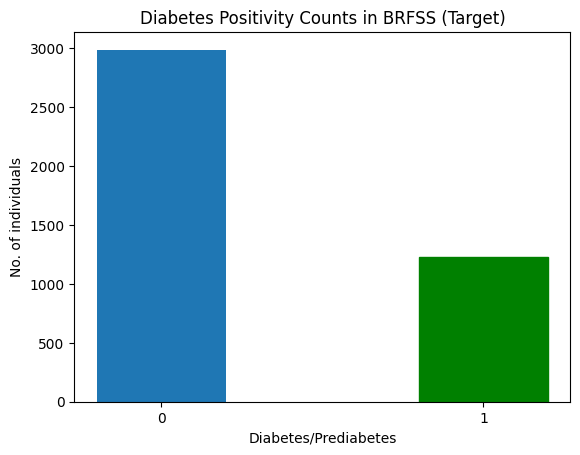

In [42]:
barlist_T = plt.bar([str(0),str(1)], y_T_full.value_counts(), width = 0.4)
barlist_T[1].set_color('g')

plt.xlabel("Diabetes/Prediabetes")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS (Target)")
plt.show()

## Updated Code (Modified from Shreya's code):

In [43]:
def create_dnn_model(input_shape):
  model = models.Sequential([layers.Dense(64, activation='relu', input_dim=input_shape),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # For binary classification (yes/no diabetes)
    ])

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])

  return model



def train_and_evaluate(model, X_train, X_test, y_train, y_test, domain):

    time_start = perf_counter()

    # Training and validation
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    # Predict probabilities and calculate AUC
    y_pred_prob = model.predict(X_test).ravel()
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f"AUC-ROC: {auc}")

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # Convert probabilities to binary predictions for confusion matrix
    y_pred_class = (y_pred_prob >= 0.5).astype(int)

    # Compute and print classification report
    class_report = classification_report(y_test, y_pred_class)
    print("Classification Report:")
    print(class_report)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_class)
    conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

    # Plot ROC curve and Confusion Matrix side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # ROC Curve
    ax1.plot(fpr, tpr, color='blue', label=f'AUC-ROC = {auc:.2f}')
    ax1.plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax1.legend(loc='lower right')
    ax1.grid()

    # Confusion Matrix
    conf_disp.plot(ax=ax2, cmap='Blues')
    ax2.set_title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

    # Calculate precision and recall for different thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    # Find the threshold where precision and recall are balanced
    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_threshold = thresholds[f1_scores.argmax()]

    print(f"Best threshold based on F1-score: {best_threshold}")

    time_stop = perf_counter()

    print('Time elapsed (performance):', time_stop-time_start)


In [44]:
def Transductive_TL(model, X_test, y_test, domain):

    time_start = perf_counter()

    # Predict probabilities and calculate AUC
    y_pred_prob = model.predict(X_test).ravel()
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f"AUC-ROC: {auc}")

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    # Convert probabilities to binary predictions for confusion matrix
    y_pred_class = (y_pred_prob >= 0.5).astype(int)

    # Compute and print classification report
    class_report = classification_report(y_test, y_pred_class)
    print("Classification Report:")
    print(class_report)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_class)
    conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

    # Plot ROC curve and Confusion Matrix side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # ROC Curve
    ax1.plot(fpr, tpr, color='blue', label=f'AUC-ROC = {auc:.2f}')
    ax1.plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax1.legend(loc='lower right')
    ax1.grid()

    # Confusion Matrix
    # print('Confusion matrix:', conf_matrix)
    fpr = conf_matrix[0][1]/(conf_matrix[0][0]+conf_matrix[0][1])
    tnr = 1-fpr

    fnr = conf_matrix[1][0]/(conf_matrix[1][0] + conf_matrix[1][1])
    tpr = 1 - fnr
    print('FPR', fpr, 'TPR:', tpr, 'FNR:', fnr, 'TNR:', tnr)
    conf_disp.plot(ax=ax2, cmap='Blues')
    ax2.set_title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

    # Calculate precision and recall for different thresholds
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    # Find the threshold where precision and recall are balanced
    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_threshold = thresholds[f1_scores.argmax()]

    print(f"Best threshold based on F1-score: {best_threshold}")
    print('False Negative Rate:', fnr)

    time_stop = perf_counter()

    print('Time elapsed (performance):', time_stop-time_start)

In [45]:
X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(X_S_full, y_S_full, test_size=0.20, random_state=0)

In [46]:
print('X_S_train:',np.shape(X_S_train))
print('y_S_train:',np.shape(y_S_train))
print('X_S_test:',np.shape(X_S_test))
print('y_S_test:',np.shape(y_S_test))

X_S_train: (199570, 21)
y_S_train: (199570,)
X_S_test: (49893, 21)
y_S_test: (49893,)


In [47]:
model_source = create_dnn_model(X_S_train.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
4990/4990 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - AUC: 0.7768 - loss: 0.3380 - val_AUC: 0.8212 - val_loss: 0.3121
Epoch 2/10
4990/4990 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - AUC: 0.8209 - loss: 0.3130 - val_AUC: 0.8221 - val_loss: 0.3113
Epoch 3/10
4990/4990 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - AUC: 0.8237 - loss: 0.3115 - val_AUC: 0.8206 - val_loss: 0.3172
Epoch 4/10
4990/4990 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - AUC: 0.8247 - loss: 0.3118 - val_AUC: 0.8248 - val_loss: 0.3108
Epoch 5/10
4990/4990 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - AUC: 0.8266 - loss: 0.3100 - val_AUC: 0.8259 - val_loss: 0.3100
Epoch 6/10
4990/4990 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - AUC: 0.8292 - loss: 0.3076 - val_AUC: 0.8262 - val_loss: 0.3091
Epoch 7/10
4990/4990 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - AUC: 0.8305 - loss: 0.3079 - val_AUC: 0.8265 - val_loss: 0.3091
Epoch 8/10
4990/4990 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - AUC: 0.8306 - loss: 0.3072 - val_AUC: 0.8264 - val_loss: 0.3091
Epoch 9/10
4990/4990 ━━━━━━━━━━━━━

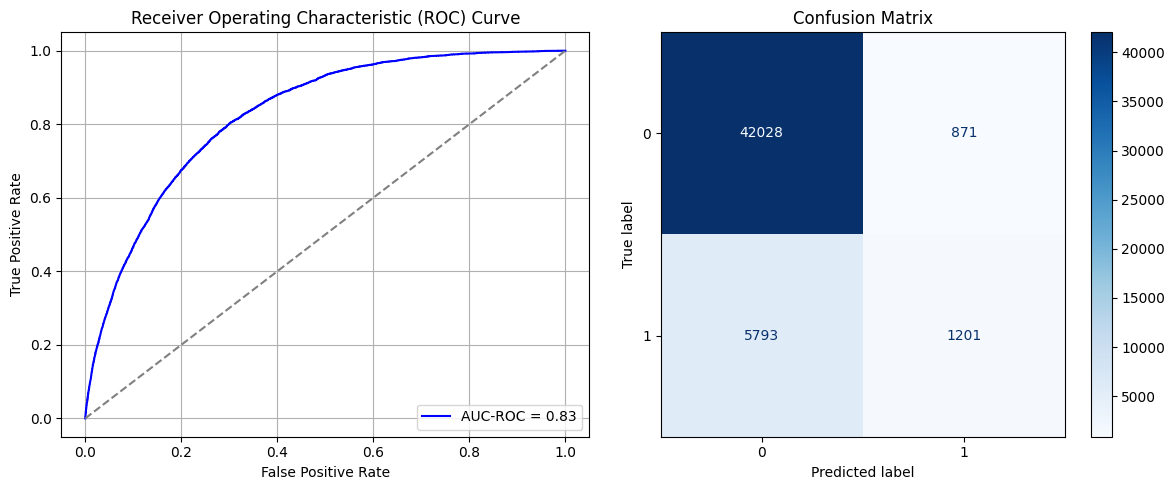

Best threshold based on F1-score: 0.24755002558231354
Time elapsed (performance): 146.80389889999992


In [48]:
train_and_evaluate(model_source, X_S_train, X_S_test, y_S_train, y_S_test, "Source")

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
AUC-ROC: 0.757929483044412
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.94      0.83      2987
           1       0.61      0.23      0.34      1230

    accuracy                           0.73      4217
   macro avg       0.68      0.59      0.59      4217
weighted avg       0.71      0.73      0.69      4217

FPR 0.061935051891529966 TPR: 0.23414634146341462 FNR: 0.7658536585365854 TNR: 0.9380649481084701


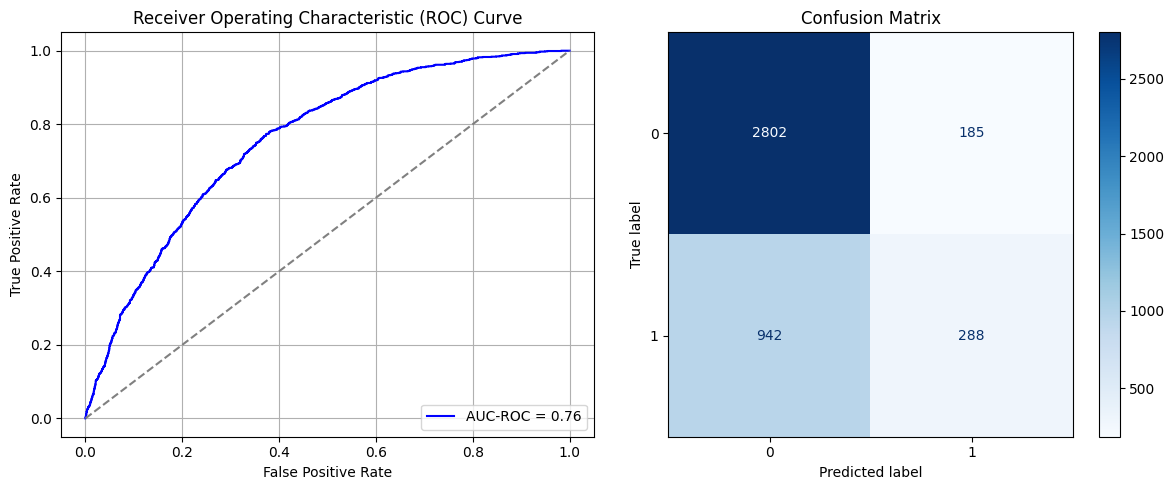

Best threshold based on F1-score: 0.7509898543357849
False Negative Rate: 0.7658536585365854
Time elapsed (performance): 0.8256047729998954


<ipython-input-44-de1f6cb50f3b>:54: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


In [49]:
Transductive_TL(model_source, X_T_full, y_T_full, "Target")

# Random Undersampling (RUS) to balance Dataset:

## SRS Sample without Replacement:

In [50]:
data_S
data_S_majority = data_S[data_S['Diabetes_binary'].isin([0])]
data_S_minority = data_S[data_S['Diabetes_binary'].isin([1])]

undersample_size = data_S_minority['Diabetes_binary'].size
oversample_size = data_S_majority['Diabetes_binary'].size

print(undersample_size)
print(oversample_size)

34116
215347


In [51]:
np.random.seed(123)
data_S_maj_rus = data_S_majority.sample(n=undersample_size, replace=False)
# print(data_S_maj_rus)

data_S_SRS_RUS = pd.concat([data_S_maj_rus, data_S_minority])
# print(data_S_SRS_RUS)

X_S_SRS = data_S_SRS_RUS.iloc[:, :21]
X_S_SRS      ## Source domain


y_S_SRS = data_S_SRS_RUS.iloc[:, 21]
y_S_SRS       ## Source classification (response)

,Diabetes_binary
180301,0
223344,0
240588,0
90367,0
152534,0
...,...
253636,1
253659,1
253668,1
253670,1


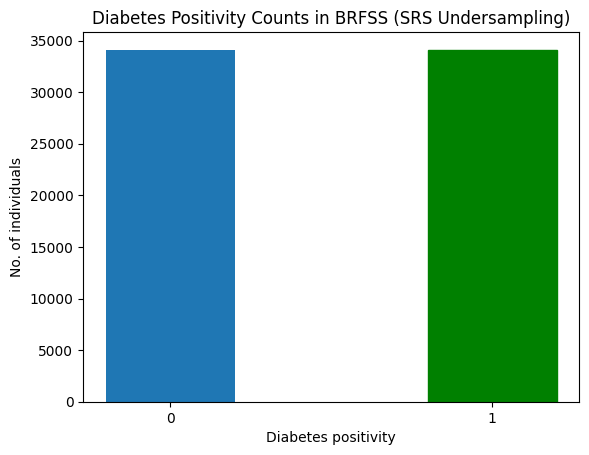

In [52]:
barlist = plt.bar([str(0),str(1)], y_S_SRS.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS (SRS Undersampling)")
plt.show()

In [53]:
X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(X_S_SRS, y_S_SRS, test_size=0.20, random_state=0)

In [54]:
print('X_S_train:',np.shape(X_S_train))
print('y_S_train:',np.shape(y_S_train))
print('X_S_test:',np.shape(X_S_test))
print('y_S_test:',np.shape(y_S_test))

X_S_train: (54585, 21)
y_S_train: (54585,)
X_S_test: (13647, 21)
y_S_test: (13647,)


In [55]:
model_source_SRS = create_dnn_model(X_S_train.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7833 - loss: 0.5581 - val_AUC: 0.8188 - val_loss: 0.5215
Epoch 2/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8177 - loss: 0.5163 - val_AUC: 0.8242 - val_loss: 0.5112
Epoch 3/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.8231 - loss: 0.5097 - val_AUC: 0.8263 - val_loss: 0.5124
Epoch 4/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8214 - loss: 0.5120 - val_AUC: 0.8276 - val_loss: 0.5084
Epoch 5/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - AUC: 0.8271 - loss: 0.5048 - val_AUC: 0.8274 - val_loss: 0.5076
Epoch 6/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8260 - loss: 0.5064 - val_AUC: 0.8287 - val_loss: 0.5081
Epoch 7/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8306 - loss: 0.5009 - val_AUC: 0.8294 - val_loss: 0.5052
Epoch 8/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8300 - loss: 0.5020 - val_AUC: 0.8294 - val_loss: 0.5053
Epoch 9/10
1365/1365 ━━━━━━━━━━━━━━━━━━━

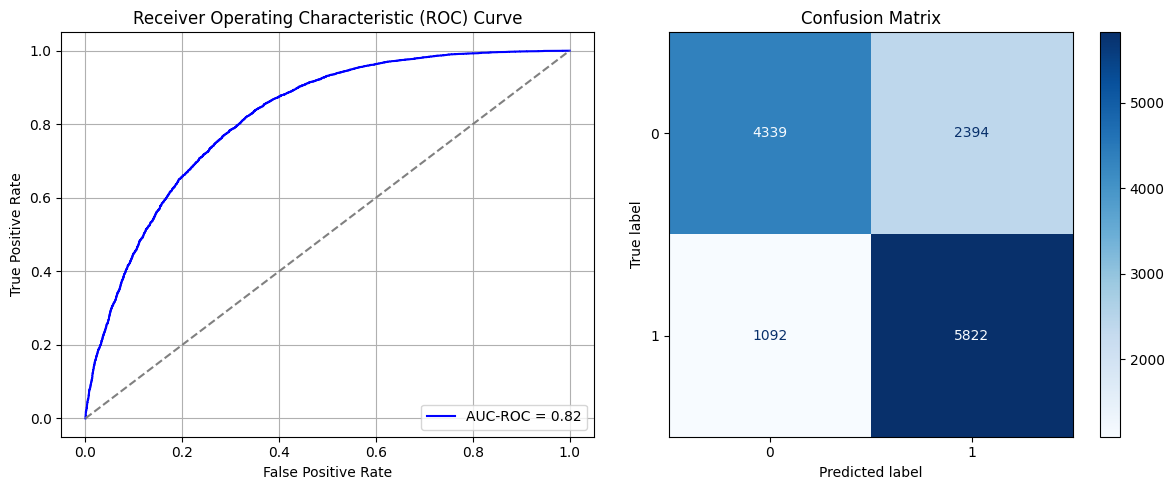

Best threshold based on F1-score: 0.3761255443096161
Time elapsed (performance): 42.70776231399998


In [56]:
train_and_evaluate(model_source_SRS, X_S_train, X_S_test, y_S_train, y_S_test, "Source")

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
AUC-ROC: 0.7627548645757632
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.33      0.48      2987
           1       0.37      0.95      0.53      1230

    accuracy                           0.51      4217
   macro avg       0.65      0.64      0.51      4217
weighted avg       0.77      0.51      0.50      4217

FPR 0.6732507532641446 TPR: 0.9455284552845529 FNR: 0.05447154471544716 TNR: 0.32674924673585537


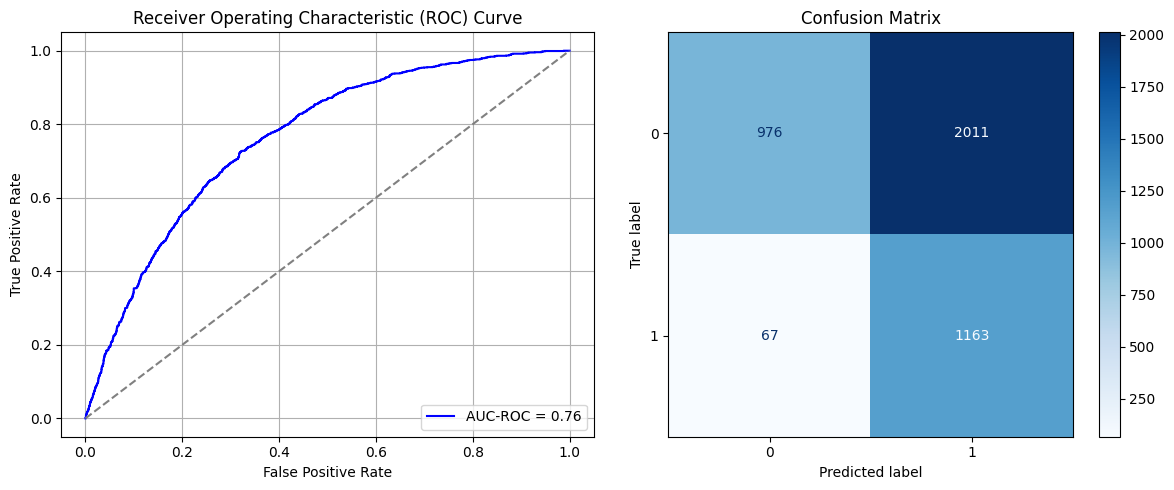

Best threshold based on F1-score: 0.7724653482437134
False Negative Rate: 0.05447154471544716
Time elapsed (performance): 0.7794678610000574


In [57]:
Transductive_TL(model_source_SRS, X_T_full, y_T_full, "Target")

## Simple Random Sampling with Replacement:

In [58]:
data_S
data_S_majority = data_S[data_S['Diabetes_binary'].isin([0])]
data_S_minority = data_S[data_S['Diabetes_binary'].isin([1])]

undersample_size = data_S_minority['Diabetes_binary'].size
oversample_size = data_S_majority['Diabetes_binary'].size

print(undersample_size)
print(oversample_size)

34116
215347


In [59]:
np.random.seed(123)
data_S_maj_rus = data_S_majority.sample(n=undersample_size, replace=True)
# print(data_S_maj_rus)

data_S_SRSwR_RUS = pd.concat([data_S_maj_rus, data_S_minority])
# print(data_S_SRS_RUS)

X_S_SRSwR = data_S_SRSwR_RUS.iloc[:, :21]
X_S_SRSwR      ## Source domain


y_S_SRSwR = data_S_SRSwR_RUS.iloc[:, 21]
y_S_SRSwR       ## Source classification (response)

,Diabetes_binary
19012,0
33080,0
21320,0
226502,0
140878,0
...,...
253636,1
253659,1
253668,1
253670,1


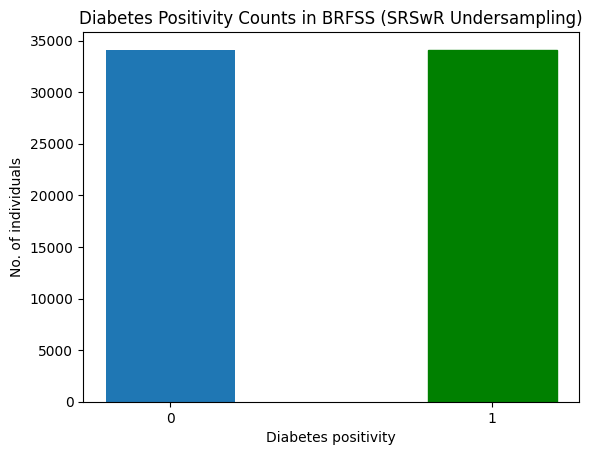

In [60]:
barlist = plt.bar([str(0),str(1)], y_S_SRSwR.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS (SRSwR Undersampling)")
plt.show()

In [61]:
X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(X_S_SRSwR, y_S_SRSwR, test_size=0.20, random_state=0)

In [62]:
print('X_S_train:',np.shape(X_S_train))
print('y_S_train:',np.shape(y_S_train))
print('X_S_test:',np.shape(X_S_test))
print('y_S_test:',np.shape(y_S_test))

X_S_train: (54585, 21)
y_S_train: (54585,)
X_S_test: (13647, 21)
y_S_test: (13647,)


In [63]:
model_source_SRSwR = create_dnn_model(X_S_train.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7887 - loss: 0.5518 - val_AUC: 0.8183 - val_loss: 0.5188
Epoch 2/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8229 - loss: 0.5103 - val_AUC: 0.8218 - val_loss: 0.5150
Epoch 3/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8247 - loss: 0.5086 - val_AUC: 0.8228 - val_loss: 0.5112
Epoch 4/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8240 - loss: 0.5094 - val_AUC: 0.8239 - val_loss: 0.5124
Epoch 5/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8309 - loss: 0.5006 - val_AUC: 0.8251 - val_loss: 0.5105
Epoch 6/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8282 - loss: 0.5039 - val_AUC: 0.8250 - val_loss: 0.5127
Epoch 7/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8292 - loss: 0.5034 - val_AUC: 0.8265 - val_loss: 0.5091
Epoch 8/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.8326 - loss: 0.4980 - val_AUC: 0.8265 - val_loss: 0.5135
Epoch 9/10
1365/1365 ━━━━━━━━━━━━━━━━━━━

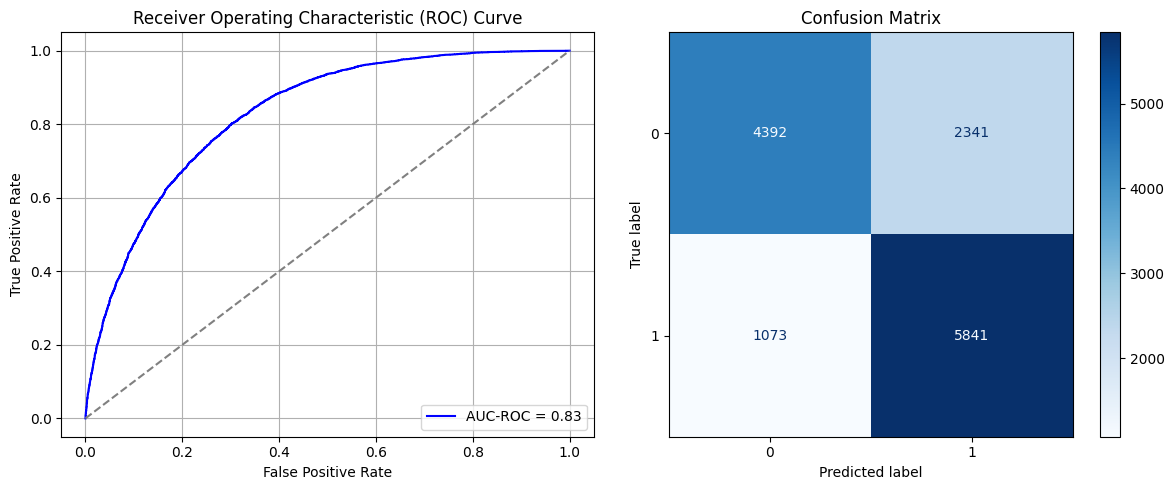

Best threshold based on F1-score: 0.44269075989723206
Time elapsed (performance): 36.680082724000044


In [64]:
train_and_evaluate(model_source_SRSwR, X_S_train, X_S_test, y_S_train, y_S_test, "Source")

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
AUC-ROC: 0.7596138823791988
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.34      0.50      2987
           1       0.37      0.94      0.53      1230

    accuracy                           0.52      4217
   macro avg       0.65      0.64      0.52      4217
weighted avg       0.77      0.52      0.51      4217

FPR 0.6561767659859391 TPR: 0.9365853658536585 FNR: 0.06341463414634146 TNR: 0.3438232340140609


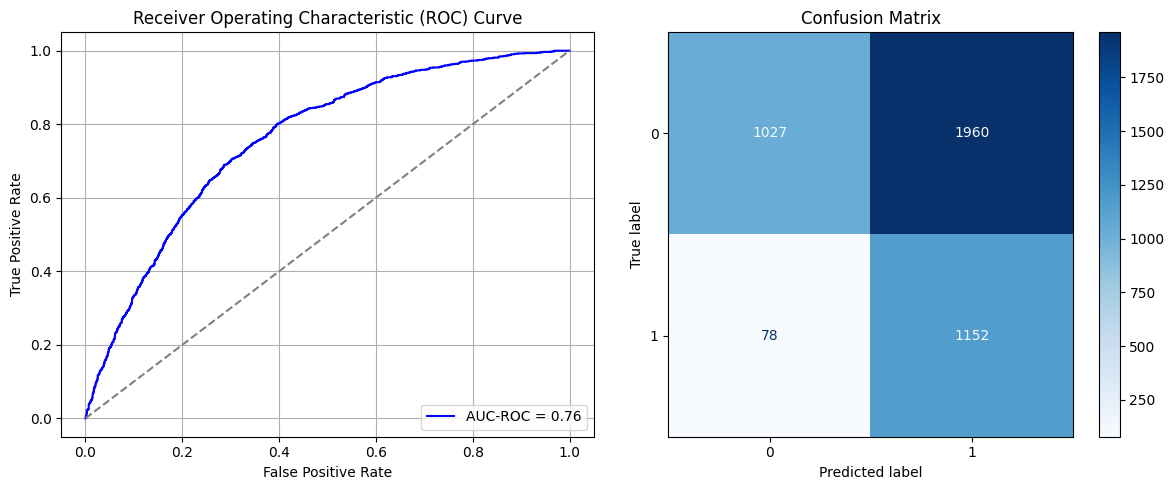

Best threshold based on F1-score: 0.7065938115119934
False Negative Rate: 0.06341463414634146
Time elapsed (performance): 0.7881913199998962


In [65]:
Transductive_TL(model_source_SRSwR, X_T_full, y_T_full, "Target")

## Systematic Sampling:

First, we select a single systematic sample from the majority class, in which $k = \frac{N_0}{N_1}$, where $N_0$ is the majority class size in the source domain and $N_1$ is the minority class in the source domain.

In [66]:
import random

k = oversample_size/undersample_size
print(k)

np.random.seed(123)
start = random.randint(1, int(k))
print(start)


6.31219955446125
4


In [67]:
data_S_majority.iloc[[1]]

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,Diabetes_binary
1,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.5,0.0,0.0,0.0,0.0,0.5,1.0,0.0,0


In [68]:
Row = []

for i in range(undersample_size):
  row = start+int(k*i)-1
  Row.append(row)

print(Row)

data_S_maj_rus = pd.DataFrame()
data_S_maj_rus = data_S_majority.iloc[Row]

data_S_maj_rus


[3, 9, 15, 21, 28, 34, 40, 47, 53, 59, 66, 72, 78, 85, 91, 97, 103, 110, 116, 122, 129, 135, 141, 148, 154, 160, 167, 173, 179, 186, 192, 198, 204, 211, 217, 223, 230, 236, 242, 249, 255, 261, 268, 274, 280, 287, 293, 299, 305, 312, 318, 324, 331, 337, 343, 350, 356, 362, 369, 375, 381, 388, 394, 400, 406, 413, 419, 425, 432, 438, 444, 451, 457, 463, 470, 476, 482, 489, 495, 501, 507, 514, 520, 526, 533, 539, 545, 552, 558, 564, 571, 577, 583, 590, 596, 602, 608, 615, 621, 627, 634, 640, 646, 653, 659, 665, 672, 678, 684, 691, 697, 703, 709, 716, 722, 728, 735, 741, 747, 754, 760, 766, 773, 779, 785, 792, 798, 804, 810, 817, 823, 829, 836, 842, 848, 855, 861, 867, 874, 880, 886, 893, 899, 905, 911, 918, 924, 930, 937, 943, 949, 956, 962, 968, 975, 981, 987, 994, 1000, 1006, 1012, 1019, 1025, 1031, 1038, 1044, 1050, 1057, 1063, 1069, 1076, 1082, 1088, 1095, 1101, 1107, 1113, 1120, 1126, 1132, 1139, 1145, 1151, 1158, 1164, 1170, 1177, 1183, 1189, 1196, 1202, 1208, 1214, 1221, 1227, 1233,

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,Diabetes_binary
3,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.25,0.000000,0.000000,0.0,0.0,0.833333,0.4,0.714286,0
11,1.0,1.0,1.0,0.255814,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.50,0.000000,1.000000,1.0,0.0,0.750000,0.8,0.000000,0
19,0.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.25,0.333333,0.000000,0.0,1.0,0.250000,1.0,1.000000,0
31,1.0,0.0,1.0,0.244186,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.00,0.000000,0.000000,1.0,1.0,1.000000,0.4,0.285714,0
39,1.0,1.0,1.0,0.139535,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.00,0.000000,1.000000,0.0,1.0,0.666667,0.4,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253642,1.0,0.0,1.0,0.197674,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.50,0.000000,0.000000,0.0,0.0,0.583333,0.8,0.142857,0
253649,0.0,1.0,1.0,0.174419,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.25,1.000000,0.166667,0.0,0.0,0.250000,1.0,0.571429,0
253657,0.0,1.0,1.0,0.139535,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.50,0.000000,0.000000,0.0,0.0,0.500000,0.8,0.285714,0
253664,0.0,1.0,1.0,0.197674,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.50,0.000000,0.000000,0.0,0.0,0.416667,1.0,0.428571,0


In [69]:
data_S_Sy_RUS = pd.concat([data_S_maj_rus, data_S_minority])
# print(data_S_SRS_RUS)

X_S_Sy = data_S_Sy_RUS.iloc[:, :21]
X_S_Sy      ## Source domain


y_S_Sy = data_S_Sy_RUS.iloc[:, 21]
y_S_Sy       ## Source classification (response)

,Diabetes_binary
3,0
11,0
19,0
31,0
39,0
...,...
253636,1
253659,1
253668,1
253670,1


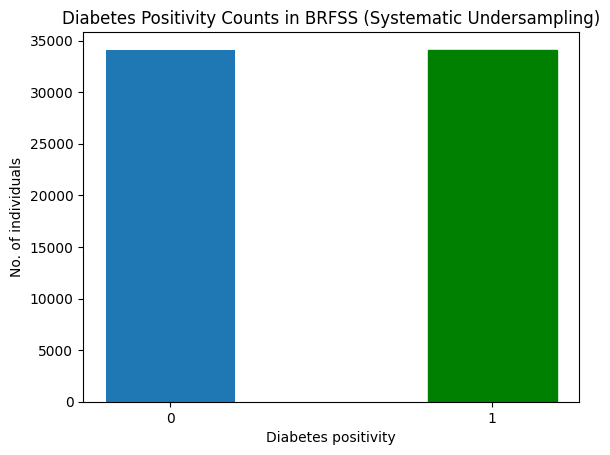

In [70]:
barlist = plt.bar([str(0),str(1)], y_S_Sy.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS (Systematic Undersampling)")
plt.show()

In [71]:
X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(X_S_Sy, y_S_Sy, test_size=0.20, random_state=0)

In [72]:
print('X_S_train:',np.shape(X_S_train))
print('y_S_train:',np.shape(y_S_train))
print('X_S_test:',np.shape(X_S_test))
print('y_S_test:',np.shape(y_S_test))

X_S_train: (54585, 21)
y_S_train: (54585,)
X_S_test: (13647, 21)
y_S_test: (13647,)


In [73]:
model_source_Sy = create_dnn_model(X_S_train.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.7796 - loss: 0.5620 - val_AUC: 0.8205 - val_loss: 0.5245
Epoch 2/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - AUC: 0.8152 - loss: 0.5197 - val_AUC: 0.8235 - val_loss: 0.5133
Epoch 3/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.8176 - loss: 0.5158 - val_AUC: 0.8256 - val_loss: 0.5229
Epoch 4/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8230 - loss: 0.5103 - val_AUC: 0.8262 - val_loss: 0.5089
Epoch 5/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8264 - loss: 0.5066 - val_AUC: 0.8272 - val_loss: 0.5131
Epoch 6/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8275 - loss: 0.5050 - val_AUC: 0.8282 - val_loss: 0.5074
Epoch 7/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.8266 - loss: 0.5053 - val_AUC: 0.8273 - val_loss: 0.5142
Epoch 8/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8283 - loss: 0.5029 - val_AUC: 0.8282 - val_loss: 0.5072
Epoch 9/10
1365/1365 ━━━━━━━━━━━━━━━━━━━

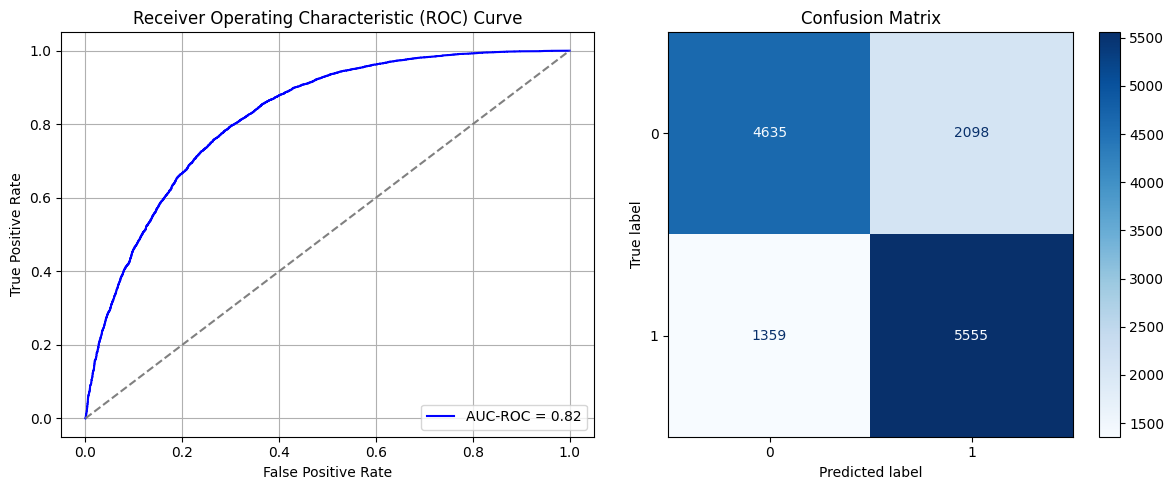

Best threshold based on F1-score: 0.36500412225723267
Time elapsed (performance): 39.29067034299999


In [74]:
train_and_evaluate(model_source_Sy, X_S_train, X_S_test, y_S_train, y_S_test, "Source")

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
AUC-ROC: 0.7629462086385177
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.36      0.52      2987
           1       0.37      0.93      0.53      1230

    accuracy                           0.53      4217
   macro avg       0.65      0.64      0.53      4217
weighted avg       0.77      0.53      0.52      4217

FPR 0.6421158352862404 TPR: 0.9317073170731707 FNR: 0.06829268292682927 TNR: 0.3578841647137596


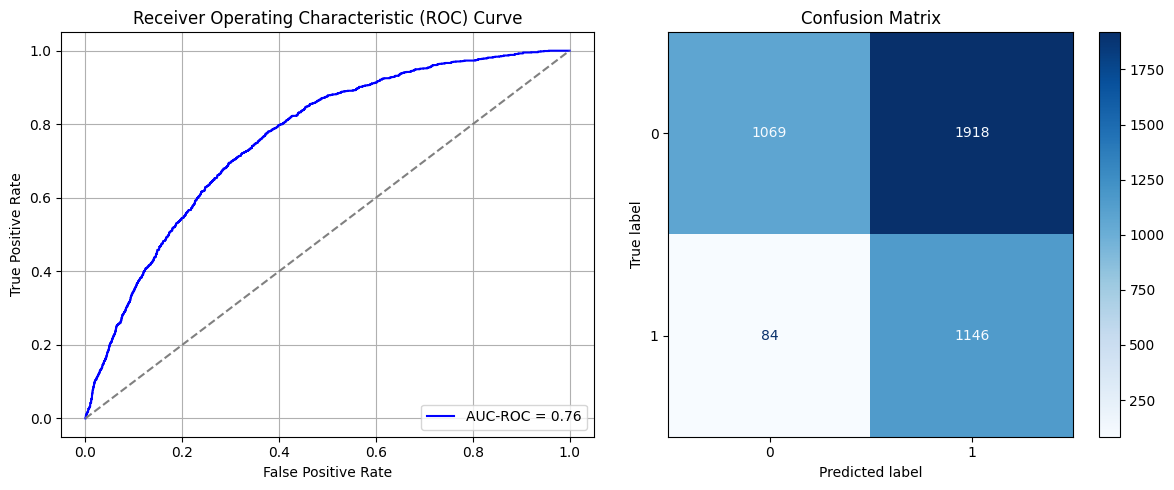

Best threshold based on F1-score: 0.7005326151847839
False Negative Rate: 0.06829268292682927
Time elapsed (performance): 0.8919142869999632


In [75]:
Transductive_TL(model_source_Sy, X_T_full, y_T_full, "Target")

## Systematic Sampling (multiple samples):

Now, we investigate the possibility of conducting $m$ systematic samples, each with a sampling interval of $k=m*\frac{N_0}{N_1}$, and obtaining the undersampled majority class data using all $m$ systematic samples combined. This may more closely approximate SRS sampling.

For convenience, we take $m=10$ in this case.

In [76]:
import random

m = 10

k = oversample_size/undersample_size * m
print(k)

np.random.seed(123)
start = random.sample(range(1, int(k)), 10)
# random.randint(1, int(k))
print(start)

63.1219955446125
[41, 2, 51, 5, 19, 21, 60, 22, 55, 13]


In [77]:
Row = []

for j in range(len(start)):
  for i in range(int(undersample_size/m)):
    row = start[j]+int(k*i)-1
    Row.append(row)

# print(Row)

data_S_maj_rus = pd.DataFrame()
data_S_maj_rus = data_S_majority.iloc[Row]

data_S_maj_rus

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,Diabetes_binary
54,0.0,1.0,1.0,0.255814,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.25,0.133333,0.000000,0.0,0.0,0.250000,1.0,1.000000,0
132,1.0,1.0,1.0,0.232558,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.00,0.000000,0.666667,1.0,0.0,0.833333,0.6,0.142857,0
215,0.0,1.0,1.0,0.209302,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.00,0.033333,0.000000,0.0,0.0,0.416667,1.0,0.857143,0
298,1.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.50,0.000000,0.000000,0.0,0.0,0.416667,0.8,0.857143,0
386,0.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.00,0.000000,0.033333,0.0,1.0,0.000000,0.6,0.285714,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253239,0.0,1.0,1.0,0.104651,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.50,0.233333,0.000000,0.0,0.0,0.083333,0.8,0.285714,0
253329,0.0,0.0,1.0,0.093023,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.50,0.000000,0.000000,0.0,0.0,0.500000,1.0,0.428571,0
253409,0.0,0.0,1.0,0.139535,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.00,0.000000,0.000000,0.0,1.0,0.666667,1.0,0.428571,0
253490,1.0,1.0,1.0,0.197674,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.50,0.000000,0.100000,0.0,0.0,0.166667,0.6,0.285714,0


In [78]:
data_S_Sy_RUS = pd.concat([data_S_maj_rus, data_S_minority])
# print(data_S_SRS_RUS)

X_S_Sy = data_S_Sy_RUS.iloc[:, :21]
X_S_Sy      ## Source domain


y_S_Sy = data_S_Sy_RUS.iloc[:, 21]
y_S_Sy       ## Source classification (response)

,Diabetes_binary
54,0
132,0
215,0
298,0
386,0
...,...
253636,1
253659,1
253668,1
253670,1


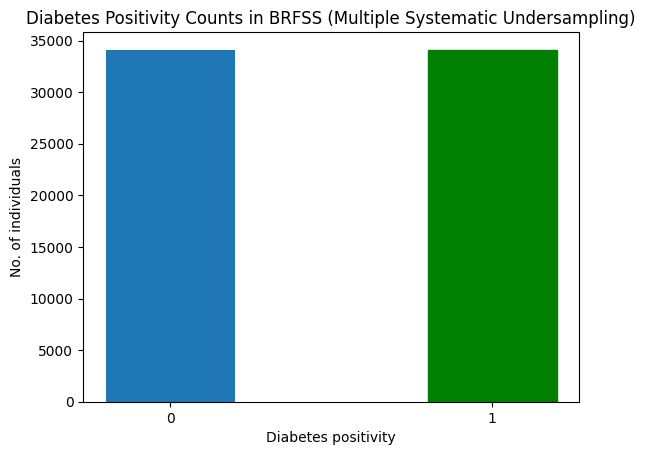

In [79]:
barlist = plt.bar([str(0),str(1)], y_S_Sy.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS (Multiple Systematic Undersampling)")
plt.show()

In [80]:
X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(X_S_Sy, y_S_Sy, test_size=0.20, random_state=0)

In [81]:
print('X_S_train:',np.shape(X_S_train))
print('y_S_train:',np.shape(y_S_train))
print('X_S_test:',np.shape(X_S_test))
print('y_S_test:',np.shape(y_S_test))

X_S_train: (54580, 21)
y_S_train: (54580,)
X_S_test: (13646, 21)
y_S_test: (13646,)


In [82]:
model_source_Sy = create_dnn_model(X_S_train.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - AUC: 0.7726 - loss: 0.5652 - val_AUC: 0.8243 - val_loss: 0.5131
Epoch 2/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - AUC: 0.8160 - loss: 0.5191 - val_AUC: 0.8283 - val_loss: 0.5105
Epoch 3/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8169 - loss: 0.5180 - val_AUC: 0.8311 - val_loss: 0.5028
Epoch 4/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUC: 0.8249 - loss: 0.5071 - val_AUC: 0.8315 - val_loss: 0.5019
Epoch 5/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8220 - loss: 0.5114 - val_AUC: 0.8316 - val_loss: 0.5031
Epoch 6/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.8243 - loss: 0.5086 - val_AUC: 0.8319 - val_loss: 0.5034
Epoch 7/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8256 - loss: 0.5077 - val_AUC: 0.8326 - val_loss: 0.5024
Epoch 8/10
1365/1365 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - AUC: 0.8239 - loss: 0.5100 - val_AUC: 0.8319 - val_loss: 0.5021
Epoch 9/10
1365/1365 ━━━━━━━━━━━━━━━━━━━

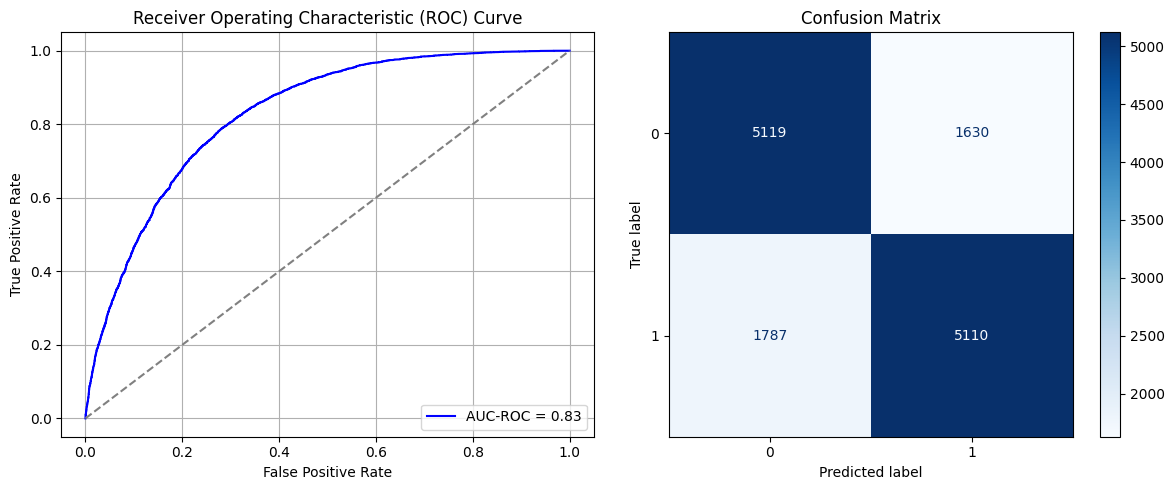

Best threshold based on F1-score: 0.3493926227092743
Time elapsed (performance): 36.22005196200007


In [83]:
train_and_evaluate(model_source_Sy, X_S_train, X_S_test, y_S_train, y_S_test, "Source")

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
AUC-ROC: 0.7595412097408554
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.42      0.57      2987
           1       0.39      0.91      0.55      1230

    accuracy                           0.56      4217
   macro avg       0.65      0.66      0.56      4217
weighted avg       0.76      0.56      0.57      4217

FPR 0.5815199196518246 TPR: 0.9073170731707317 FNR: 0.09268292682926829 TNR: 0.4184800803481754


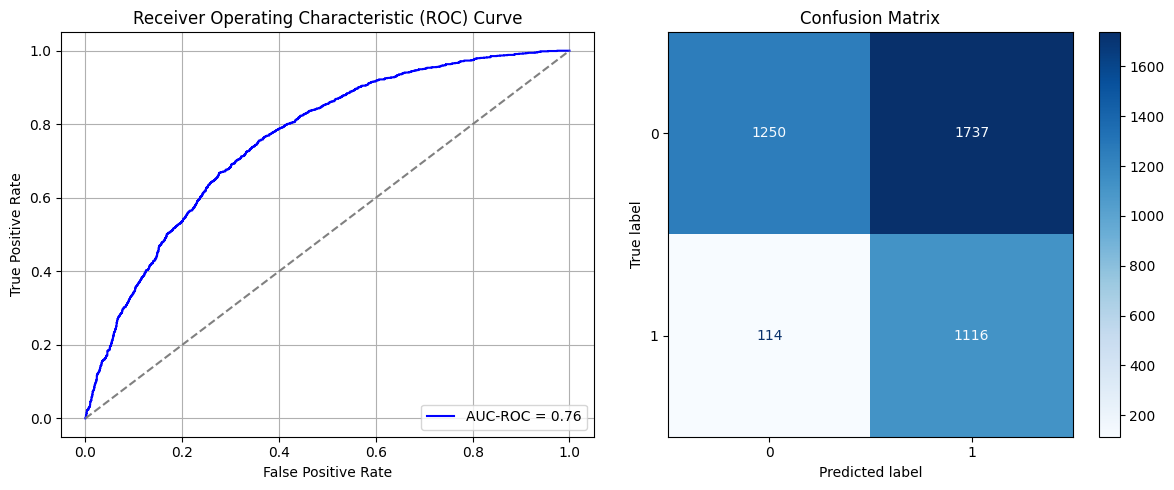

Best threshold based on F1-score: 0.9675523042678833
False Negative Rate: 0.09268292682926829
Time elapsed (performance): 1.2999542070000416


<ipython-input-44-de1f6cb50f3b>:54: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


In [84]:
Transductive_TL(model_source_Sy, X_T_full, y_T_full, "Target")

# Random Oversampling (ROS):

## Simple Random Sampling with Replacement:

In this case, we investigate the effectiveness of Random Oversampling methods, beginning with Simple Random Sampling (SRS) with replacement. For this, we perform random resampling from the minority class of size $N_1$ to generate an additional sample of size $N_0-N_1$, such that the oversampled minority class will have the same size as the majority class.

In [85]:
data_S
data_S_majority = data_S[data_S['Diabetes_binary'].isin([0])]
data_S_minority = data_S[data_S['Diabetes_binary'].isin([1])]

undersample_size = data_S_minority['Diabetes_binary'].size
oversample_size = data_S_majority['Diabetes_binary'].size

print(undersample_size)
print(oversample_size)

34116
215347


In [86]:
np.random.seed(123)
data_S_min_ros = data_S_minority.sample(n=oversample_size - undersample_size, replace=True)
# print(data_S_min_ros)

data_S_SRS_ROS = pd.concat([data_S_majority, data_S_min_ros, data_S_minority])
# print(data_S_SRS_ROS)

X_S_SRS = data_S_SRS_ROS.iloc[:, :21]
X_S_SRS      ## Source domain


y_S_SRS = data_S_SRS_ROS.iloc[:, 21]
y_S_SRS       ## Source classification (response)

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0
...,...
253636,1
253659,1
253668,1
253670,1


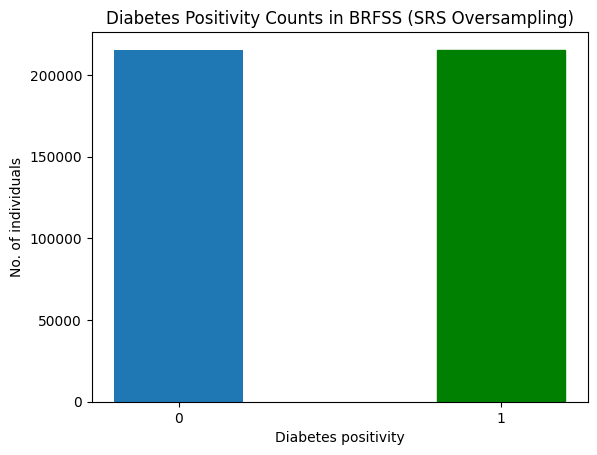

In [87]:
barlist = plt.bar([str(0),str(1)], y_S_SRS.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS (SRS Oversampling)")
plt.show()

In [88]:
X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(X_S_SRS, y_S_SRS, test_size=0.20, random_state=0)

In [89]:
model_source_SRS_ROS = create_dnn_model(X_S_train.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
8614/8614 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - AUC: 0.8131 - loss: 0.5235 - val_AUC: 0.8294 - val_loss: 0.5062
Epoch 2/10
8614/8614 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - AUC: 0.8268 - loss: 0.5061 - val_AUC: 0.8308 - val_loss: 0.5015
Epoch 3/10
8614/8614 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - AUC: 0.8287 - loss: 0.5036 - val_AUC: 0.8303 - val_loss: 0.5027
Epoch 4/10
8614/8614 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - AUC: 0.8318 - loss: 0.4998 - val_AUC: 0.8319 - val_loss: 0.5035
Epoch 5/10
8614/8614 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - AUC: 0.8321 - loss: 0.4994 - val_AUC: 0.8323 - val_loss: 0.4990
Epoch 6/10
8614/8614 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - AUC: 0.8314 - loss: 0.4997 - val_AUC: 0.8338 - val_loss: 0.4975
Epoch 7/10
8614/8614 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - AUC: 0.8331 - loss: 0.4975 - val_AUC: 0.8332 - val_loss: 0.5004
Epoch 8/10
8614/8614 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - AUC: 0.8328 - loss: 0.4980 - val_AUC: 0.8331 - val_loss: 0.4970
Epoch 9/10
8614/8614 ━━━━━━━━━━━

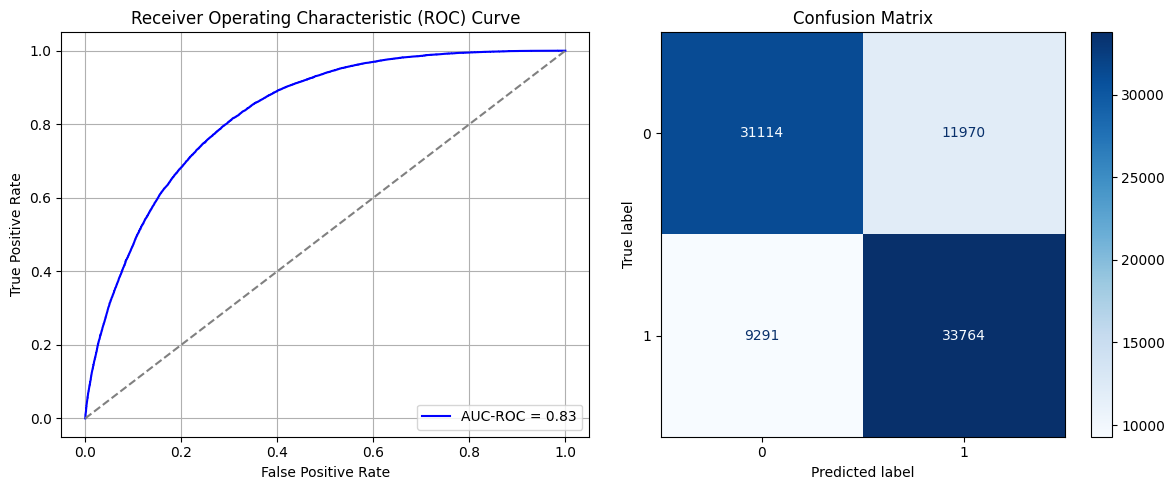

Best threshold based on F1-score: 0.3589056134223938
Time elapsed (performance): 189.17950069300002


In [90]:
train_and_evaluate(model_source_SRS_ROS, X_S_train, X_S_test, y_S_train, y_S_test, "Source")

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
AUC-ROC: 0.7635398379427383
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.39      0.54      2987
           1       0.38      0.92      0.54      1230

    accuracy                           0.54      4217
   macro avg       0.65      0.65      0.54      4217
weighted avg       0.77      0.54      0.54      4217

FPR 0.6146635420154001 TPR: 0.9219512195121952 FNR: 0.07804878048780488 TNR: 0.3853364579845999


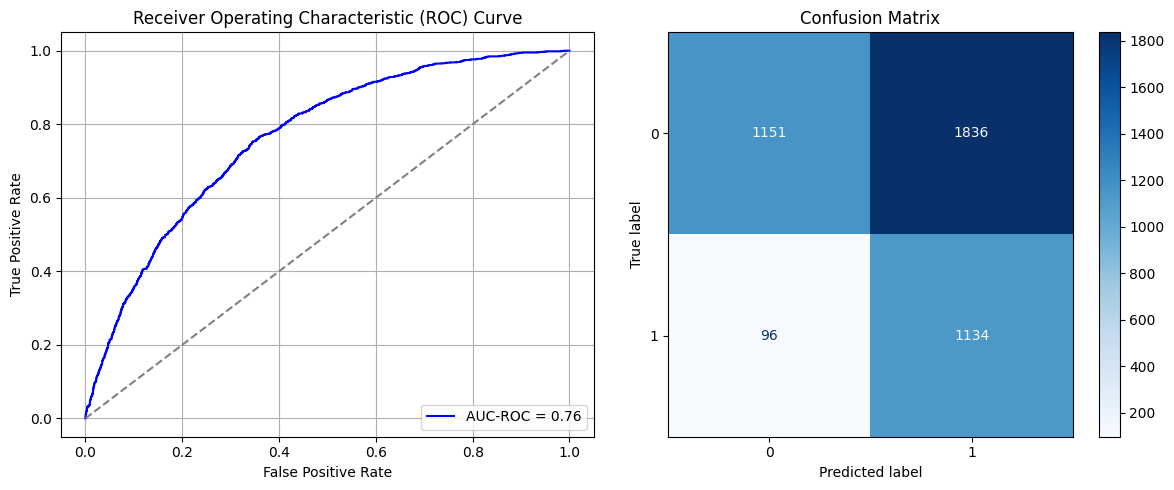

Best threshold based on F1-score: 0.6920593976974487
False Negative Rate: 0.07804878048780488
Time elapsed (performance): 0.89947901000005


In [91]:
Transductive_TL(model_source_SRS_ROS, X_T_full, y_T_full, "Target")

## Systematic Resampling:

In this case, we examine the possibility of performing Random Oversampling on the minority class using systematic sampling. For this purpose, taking a sampling interval of $k$, we would compile a total of $k*\frac{N_0-N_1}{N_1}$ systematic samples from the minority class in order to balance the dataset. We sample the starting point from 1 to $k$ *with replacement*, since a highly imbalanced dataset will require sampling with replacement in order to achieve a balanced dataset.

In particular, taking $k=48$ yields a number of samples of $k*\frac{N_0-N_1}{N_1}=254.986 \approx 255$, so we take $k=48$.

In [92]:
import random

k = 48

Nsamples = k*(oversample_size-undersample_size)/undersample_size
# print(Nsamples)

np.random.seed(123)
start = np.random.choice(int(k), int(Nsamples), replace=True)
# print(start)


Row = []

for j in range(len(start)):
  for i in range(int(undersample_size/k)):
    row = start[j]+int(k*i)-1
    Row.append(row)

# print(Row)

data_S_min_ros = pd.DataFrame()
data_S_min_ros = data_S_minority.iloc[Row]

data_S_Sy_ROS = pd.concat([data_S_majority, data_S_min_ros, data_S_minority])
# print(data_S_SRS_ROS)

X_S_Sy = data_S_Sy_ROS.iloc[:, :21]
X_S_Sy      ## Source domain


y_S_Sy = data_S_Sy_ROS.iloc[:, 21]
y_S_Sy       ## Source classification (response)




,Diabetes_binary
0,0
1,0
2,0
3,0
4,0
...,...
253636,1
253659,1
253668,1
253670,1


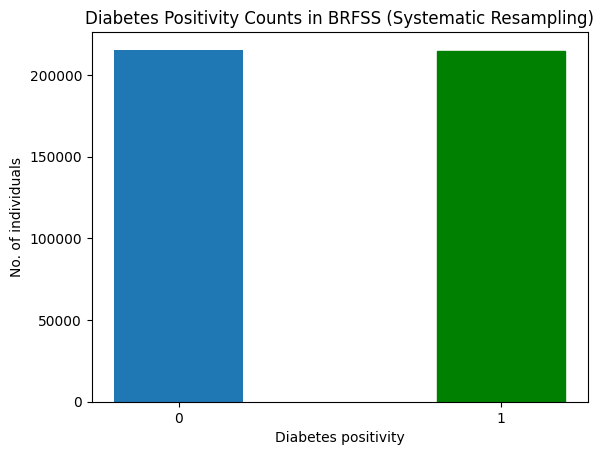

In [93]:
barlist = plt.bar([str(0),str(1)], y_S_Sy.value_counts(), width = 0.4)
barlist[1].set_color('g')

plt.xlabel("Diabetes positivity")
plt.ylabel("No. of individuals")
plt.title("Diabetes Positivity Counts in BRFSS (Systematic Resampling)")
plt.show()

In [94]:
X_S_train, X_S_test, y_S_train, y_S_test = train_test_split(X_S_Sy, y_S_Sy, test_size=0.20, random_state=0)

In [95]:
model_source_Sy_ROS = create_dnn_model(X_S_train.shape[1])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
8597/8597 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - AUC: 0.8110 - loss: 0.5258 - val_AUC: 0.8284 - val_loss: 0.5041
Epoch 2/10
8597/8597 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - AUC: 0.8263 - loss: 0.5063 - val_AUC: 0.8311 - val_loss: 0.5013
Epoch 3/10
8597/8597 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - AUC: 0.8287 - loss: 0.5030 - val_AUC: 0.8327 - val_loss: 0.5007
Epoch 4/10
8597/8597 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - AUC: 0.8312 - loss: 0.5000 - val_AUC: 0.8327 - val_loss: 0.5013
Epoch 5/10
8597/8597 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - AUC: 0.8299 - loss: 0.5011 - val_AUC: 0.8331 - val_loss: 0.4990
Epoch 6/10
8597/8597 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - AUC: 0.8322 - loss: 0.4980 - val_AUC: 0.8345 - val_loss: 0.4963
Epoch 7/10
8597/8597 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - AUC: 0.8319 - loss: 0.4987 - val_AUC: 0.8341 - val_loss: 0.4966
Epoch 8/10
8597/8597 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - AUC: 0.8342 - loss: 0.4953 - val_AUC: 0.8342 - val_loss: 0.4971
Epoch 9/10
8597/8597 ━━━━━━━━━━━

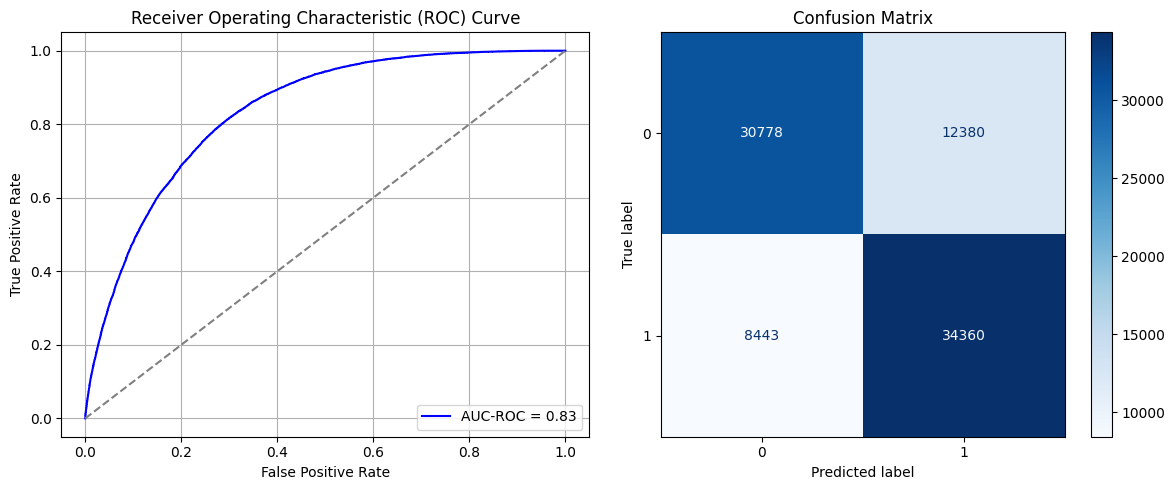

Best threshold based on F1-score: 0.3956603407859802
Time elapsed (performance): 201.481650918


In [96]:
train_and_evaluate(model_source_Sy_ROS, X_S_train, X_S_test, y_S_train, y_S_test, "Source")

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
AUC-ROC: 0.756981608651038
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.40      0.55      2987
           1       0.39      0.92      0.54      1230

    accuracy                           0.55      4217
   macro avg       0.66      0.66      0.55      4217
weighted avg       0.77      0.55      0.55      4217

FPR 0.6049548041513224 TPR: 0.9235772357723577 FNR: 0.07642276422764227 TNR: 0.3950451958486776


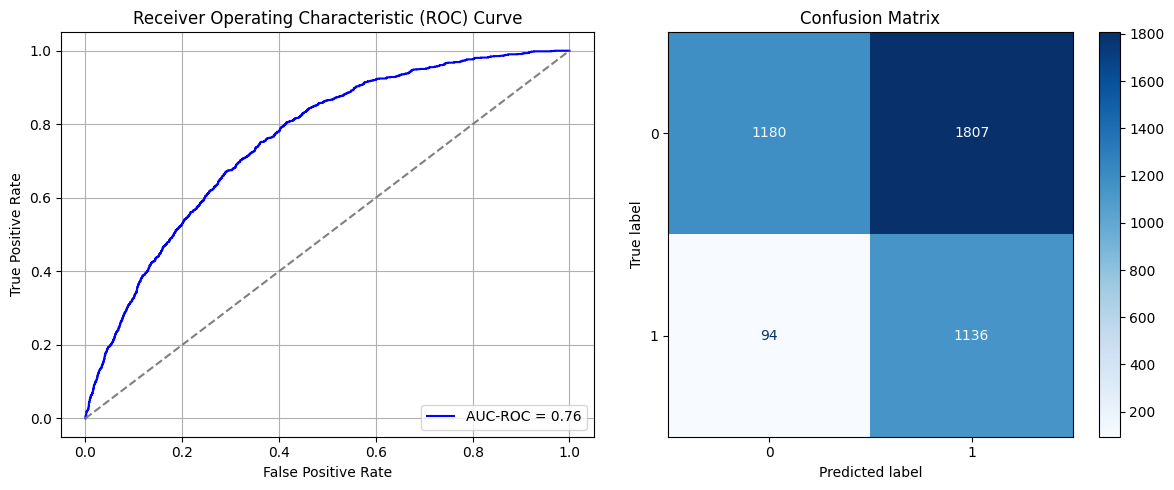

Best threshold based on F1-score: 0.6300007700920105
False Negative Rate: 0.07642276422764227
Time elapsed (performance): 0.9132196680000106


In [97]:
Transductive_TL(model_source_Sy_ROS, X_T_full, y_T_full, "Target")